<center>

#**TALLER HURTOS**

Teoría y Lógica de Programación

Docente: Carlos Arturo Gómez Jiménez

Estudiante: Nicole Tovar Matinez

Código: 20221579026

2023

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
hurtos = pd.read_csv('/content/drive/MyDrive/PROGRAMACION/robos.csv')
hurtos

,FECHA HECHO,COD_DEPTO,DEPARTAMENTO,COD_MUNI,MUNICIPIO,CANTIDAD
0,01/01/2017,5,ANTIOQUIA,5001,MEDELLIN,21
1,01/01/2017,5,ANTIOQUIA,5042,SANTAFE DE ANTIOQUIA,1
2,01/01/2017,5,ANTIOQUIA,5045,APARTADO,1
3,01/01/2017,5,ANTIOQUIA,5088,BELLO,4
4,01/01/2017,5,ANTIOQUIA,5154,CAUCASIA,1
...,...,...,...,...,...,...
241104,01/01/2023,76,VALLE DEL CAUCA,76892,YUMBO,3
241105,01/01/2023,85,CASANARE,85001,YOPAL,6
241106,01/01/2023,85,CASANARE,85010,AGUAZUL,1
241107,01/01/2023,85,CASANARE,85250,PAZ DE ARIPORO,2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
hurtos["DEPARTAMENTO"].value_counts()

CUNDINAMARCA          33462
ANTIOQUIA             31603
VALLE DEL CAUCA       19313
SANTANDER             14021
TOLIMA                11208
ATLÁNTICO             10055
BOYACÁ                 9440
CAUCA                  8779
HUILA                  8460
CESAR                  8170
NARIÑO                 7707
BOLÍVAR                7630
NORTE DE SANTANDER     6851
MAGDALENA              6362
META                   6352
CÓRDOBA                6215
QUINDÍO                5880
LA GUAJIRA             5782
RISARALDA              5587
SUCRE                  5186
CALDAS                 5105
CASANARE               3757
CAQUETÁ                2787
CHOCÓ                  2398
BOGOTÁ D.C.            2222
ARAUCA                 1858
PUTUMAYO               1671
SAN ANDRÉS ISLAS       1354
AMAZONAS                640
GUAVIARE                461
GUAINÍA                 361
VICHADA                 315
VAUPÉS                  117
Name: DEPARTAMENTO, dtype: int64

##1. Realizar la comparación de hurtos entre Medellín, Bogotá y Cali para el año 2020 y sacar tres conclusiones. 

In [ ]:
hurtos ['FECHA HECHO'] = pd.to_datetime(hurtos['FECHA HECHO'])
hurtos
ciudades = ['MEDELLIN', 'CALI', 'BOGOTA, D.C.']
hurtos_2020 = hurtos[(hurtos['FECHA HECHO'].dt.year == 2020) & (hurtos['MUNICIPIO'].isin(ciudades))]
hurtos_2020

<ipython-input-7-e1bd158c9602>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  hurtos ['FECHA HECHO'] = pd.to_datetime(hurtos['FECHA HECHO'])


,FECHA HECHO,COD_DEPTO,DEPARTAMENTO,COD_MUNI,MUNICIPIO,CANTIDAD
116459,2020-01-01,5,ANTIOQUIA,5001,MEDELLIN,86
116486,2020-01-01,11,BOGOTÁ D.C.,11001,"BOGOTA, D.C.",352
116628,2020-01-01,76,VALLE DEL CAUCA,76001,CALI,86
116653,2020-02-01,5,ANTIOQUIA,5001,MEDELLIN,123
116677,2020-02-01,11,BOGOTÁ D.C.,11001,"BOGOTA, D.C.",453
...,...,...,...,...,...,...
149625,2020-12-30,11,BOGOTÁ D.C.,11001,"BOGOTA, D.C.",321
149710,2020-12-30,76,VALLE DEL CAUCA,76001,CALI,54
149724,2020-12-31,5,ANTIOQUIA,5001,MEDELLIN,43
149743,2020-12-31,11,BOGOTÁ D.C.,11001,"BOGOTA, D.C.",157


In [ ]:
hurtos_ciudad = hurtos_2020.groupby('MUNICIPIO')['CANTIDAD'].sum()
hurtos_ciudad

MUNICIPIO
BOGOTA, D.C.    83156
CALI            13531
MEDELLIN        17780
Name: CANTIDAD, dtype: int64

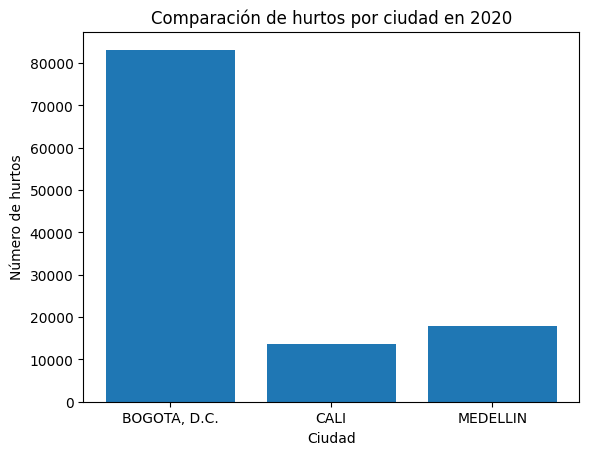

In [ ]:
plt.bar(hurtos_ciudad.index, hurtos_ciudad.values)
plt.title('Comparación de hurtos por ciudad en 2020')
plt.xlabel('Ciudad')
plt.ylabel('Número de hurtos')
plt.show()

## Conclusiones acerca de los hurtos en 2020 para Bogotá, Medellín y Cali:
1. El pico más alto de hurtos se encuentra en la ciudad de Bogota´, sin embargo Cali y Medellín presentan unca cantidad similar de hurtos para el año 2020.
2. Es importante resaltar que la población de Bogotá es mayor a la de Cali y Medellín, en consecuencia existirán mas robos en Bogotá que en las otras ciudades.
3. Es interesante observar la cantidad de hurtos que se presentaron especialmente para este año, pues a pesar de que hubo pandemía se seguían presentando robos.

## 2. En cuál departamento, ignorando Bogotá, se presentó más hurtos para marzo 2019.

In [ ]:
hurtos_2019 = hurtos.loc[(hurtos['FECHA HECHO'].dt.month == 3) & (hurtos['FECHA HECHO'].dt.year == 2019) & (hurtos['MUNICIPIO'] != 'BOGOTA, D.C.')]
hurtos_2019

,FECHA HECHO,COD_DEPTO,DEPARTAMENTO,COD_MUNI,MUNICIPIO,CANTIDAD
75500,2019-03-01,5,ANTIOQUIA,5001,MEDELLIN,56
75501,2019-03-01,5,ANTIOQUIA,5038,ANGOSTURA,1
75502,2019-03-01,5,ANTIOQUIA,5079,BARBOSA,1
75503,2019-03-01,5,ANTIOQUIA,5088,BELLO,3
75504,2019-03-01,5,ANTIOQUIA,5266,ENVIGADO,3
...,...,...,...,...,...,...
112922,2019-03-12,81,ARAUCA,81001,ARAUCA,2
112923,2019-03-12,85,CASANARE,85001,YOPAL,9
112924,2019-03-12,85,CASANARE,85440,VILLANUEVA,1
112925,2019-03-12,88,SAN ANDRÉS ISLAS,88001,SAN ANDRES,1


In [ ]:
df_agrupado = hurtos_2019.groupby(['DEPARTAMENTO'])['CANTIDAD'].sum()
df_agrupado

DEPARTAMENTO
AMAZONAS                 7
ANTIOQUIA             3016
ARAUCA                  38
ATLÁNTICO             1302
BOLÍVAR                609
BOYACÁ                 291
CALDAS                 231
CAQUETÁ                117
CASANARE               124
CAUCA                  448
CESAR                  318
CHOCÓ                   63
CUNDINAMARCA          1229
CÓRDOBA                230
GUAINÍA                  5
GUAVIARE                11
HUILA                  381
LA GUAJIRA             164
MAGDALENA              355
META                   508
NARIÑO                 477
NORTE DE SANTANDER     375
PUTUMAYO                32
QUINDÍO                221
RISARALDA              253
SAN ANDRÉS ISLAS        34
SANTANDER              992
SUCRE                  171
TOLIMA                 538
VALLE DEL CAUCA       2128
VAUPÉS                   1
VICHADA                  4
Name: CANTIDAD, dtype: int64

In [ ]:
departamento_max_hurtos = df_agrupado.idxmax()
departamento_max_hurtos

'ANTIOQUIA'

##3. Investigar cuál fue la población por departamento para el año 2022. Ingresarlo como diccionario y realizar la división a través de Pandas entre cantidad de hurtos por departamento y población. ¿Qué da como resultado esto? Realizar el diagrama que usted considere más conveniente para mostrar los resultados.

In [ ]:
hurtos_2022 = hurtos[(hurtos['FECHA HECHO'].dt.year == 2022) & (hurtos['MUNICIPIO'])]
hurtos_2022

,FECHA HECHO,COD_DEPTO,DEPARTAMENTO,COD_MUNI,MUNICIPIO,CANTIDAD
191349,2022-01-01,5,ANTIOQUIA,5001,MEDELLIN,28
191350,2022-01-01,5,ANTIOQUIA,5031,AMALFI,1
191351,2022-01-01,5,ANTIOQUIA,5034,ANDES,1
191352,2022-01-01,5,ANTIOQUIA,5088,BELLO,2
191353,2022-01-01,5,ANTIOQUIA,5120,CACERES,1
...,...,...,...,...,...,...
237046,2022-01-12,88,SAN ANDRÉS ISLAS,88001,SAN ANDRES,1
237047,2022-01-12,94,GUAINÍA,94001,INIRIDA,1
237048,2022-01-12,95,GUAVIARE,95001,SAN JOSE DEL GUAVIARE,3
237049,2022-01-12,97,VAUPÉS,97001,MITU,1


In [ ]:
df_agrupado2 = hurtos_2022.groupby(['DEPARTAMENTO'])['CANTIDAD'].sum()
df_agrupado2

DEPARTAMENTO
AMAZONAS                 163
ANTIOQUIA              41374
ARAUCA                   450
ATLÁNTICO              21003
BOGOTÁ D.C.           136802
BOLÍVAR                 7887
BOYACÁ                  3590
CALDAS                  1793
CAQUETÁ                 1479
CASANARE                2346
CAUCA                   5536
CESAR                   5197
CHOCÓ                    819
CUNDINAMARCA           22644
CÓRDOBA                 2420
GUAINÍA                   67
GUAVIARE                 113
HUILA                   7668
LA GUAJIRA              2142
MAGDALENA               5868
META                    6878
NARIÑO                  7538
NORTE DE SANTANDER      4653
PUTUMAYO                 429
QUINDÍO                 3261
RISARALDA               5265
SAN ANDRÉS ISLAS         381
SANTANDER              13743
SUCRE                   2304
TOLIMA                  7848
VALLE DEL CAUCA        31997
VAUPÉS                    28
VICHADA                   58
Name: CANTIDAD, dtype: int64

In [ ]:
poblacion = {
    'AMAZONAS': 83808,
    'ANTIOQUIA': 6994792,
    'ARAUCA': 308301,
    'ATLÁNTICO': 2835509,
    'BOGOTÁ D.C.': 7968095,
    'BOLÍVAR': 2258929,
    'BOYACÁ': 1267378,
    'CALDAS': 1046418,
    'CAQUETÁ': 423857,
    'CASANARE': 444602,
    'CAUCA': 1528076,
    'CESAR': 1359719,
    'CHOCÓ': 557654,
    'CUNDINAMARCA': 3577177,
    'CÓRDOBA': 1868166,
    'GUAINÍA': 52627,
    'GUAVIARE': 92281,
    'HUILA': 1149598,
    'LA GUAJIRA': 1015909,
    'MAGDALENA': 1476665,
    'META': 1088749,
    'NARIÑO': 1631117,
    'NORTE DE SANTANDER': 1658835,
    'PUTUMAYO': 374042,
    'QUINDÍO': 577543,
    'RISARALDA': 988091,
    'SAN ANDRÉS ISLAS': 65663,
    'SANTANDER': 2340657,
    'SUCRE': 981727,
    'TOLIMA': 1350060,
    'VALLE DEL CAUCA': 4622132,
    'VAUPÉS': 51133,
    'VICHADA': 116944
}


In [ ]:

df_poblacion = pd.DataFrame(poblacion.items(), columns=['Departamento', 'Poblacion'])
df_poblacion

,Departamento,Poblacion
0,AMAZONAS,83808
1,ANTIOQUIA,6994792
2,ARAUCA,308301
3,ATLÁNTICO,2835509
4,BOGOTÁ D.C.,7968095
5,BOLÍVAR,2258929
6,BOYACÁ,1267378
7,CALDAS,1046418
8,CAQUETÁ,423857
9,CASANARE,444602


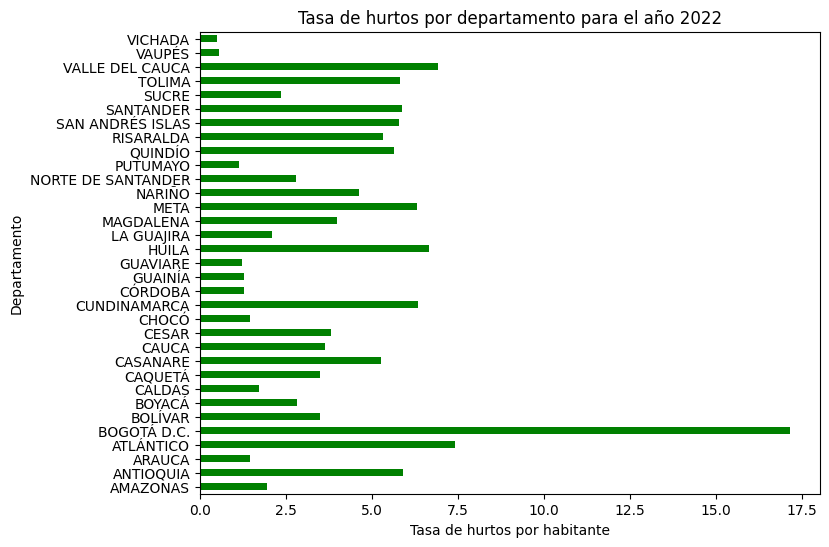

In [ ]:
df_tasa_hurto = df_agrupado2.divide(pd.Series(poblacion))
df_tasa_hurtos = df_tasa_hurto*1000 
ax = df_tasa_hurtos.plot(kind='barh', color='green', figsize=(8,6))
ax.set_xlabel('Tasa de hurtos por habitante')
ax.set_ylabel('Departamento')
ax.set_title('Tasa de hurtos por departamento para el año 2022')
plt.show()